In [3]:
import pandas as pd
import numpy as np

# 读取CSV文件
data = pd.read_csv('pro_stru_features.csv')

# 将数据转换为数组形式
X = np.array(data.drop(['normalized_length', 'normalized_abs_surf_acc', 'rel_surf_acc', 'prob_helix', 'prob_sheet', 'prob_coil'], axis=1)) # 特征
y = np.array(data['p_interface']) # 标签

# 将特征列名称替换为实际的特征列名称
X = data[['normalized_length', 'normalized_abs_surf_acc', 'rel_surf_acc', 'prob_helix', 'prob_sheet', 'prob_coil']].values


In [4]:
from sklearn.model_selection import train_test_split

# 分割数据集为训练集、验证集和测试集
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2


In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# 定义SVM分类器
svc = SVC()

# 定义超参数空间
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# 使用网格搜索来寻找最优参数组合
grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 输出最优参数组合
print('Best parameters:', grid_search.best_params_)


Best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [7]:
# 使用最优参数来定义SVM分类器
svc = SVC(C=grid_search.best_params_['C'], kernel=grid_search.best_params_['kernel'], gamma=grid_search.best_params_['gamma'])

# 在训练集上训练模型
svc.fit(X_train, y_train)

SVC(C=0.1, kernel='linear')

In [8]:
from sklearn.metrics import accuracy_score

# 在测试集上评估模型性能
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8781273983115886


AUC: 0.5316828193645726


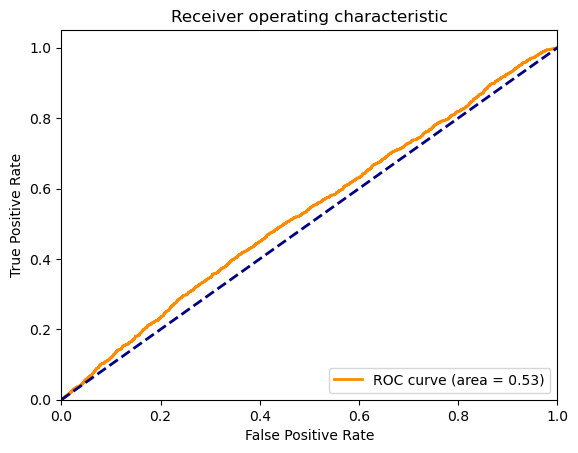

In [9]:
from sklearn.metrics import roc_curve, auc

# 在验证集上预测概率并计算AUC值
y_score = svc.decision_function(X_val)
fpr, tpr, thresholds = roc_curve(y_val, y_score, pos_label=1)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

# 绘制ROC曲线
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()